# 地理空间数据--矢量

我们常见的矢量数据类型有Shapefile格式、GeoJSON格式、GML格式、KML格式等。  
现在我们演示下在Python中对shapefile文件进行读写操作。  
学习目标有以下三点：  
（1）使用 geopandas 打开shp文件。  
（2）在 Python 中查看矢量数据的 CRS 和其他元数据  
（3）在 Python 中绘制shp文件。

##  1 使用 geopandas 中打开shp文件
**（1）导入包和要用的数据**

In [9]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [10]:
# Import shapefile using geopandas
sjer_plot_locations = gpd.read_file("../earth-analytics/SJER_crop2/SJER_plot_centroids.shp")

**(2)我们可以使用head()函数仅显示属性表的前几行。函数中的数字表示函数将返回的总行数。例如**

In [11]:
# View top 6 rows of attribute table
sjer_plot_locations.head(6)

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.570)


In [12]:
# View the geometry type of each row
sjer_plot_locations.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

## 2 Shapefile 元数据和属性
将 shapefile 图层使用**gpd.read_file()** 函数导入时，会自动将有关数据的信息存储为属性。  
所有shp文件的关键元数据包括：  
（1）对象类型：导入对象的类。  
（2）坐标参考系 （CRS）。  
（3）范围：shp文件的空间范围（即shp文件覆盖的地理区域）。  
我们可以使用**and attributes** 查看这些 shapefile 元数据：

In [13]:
# View object type
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

In [14]:
# View CRS of object
sjer_plot_locations.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
# View the spatial extent
sjer_plot_locations.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

## 3 打印shp文件
语法：**dataframe_name.plot()**  
我们可以调用 .plot（） 而不设置图形和轴对象，如下所示：

<Axes: >

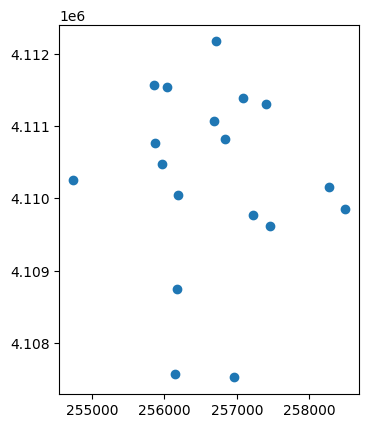

In [16]:
sjer_plot_locations.plot()

但是，一般来说最好设置轴对象，以便可以一起绘制不同的图层。执行此操作时，需要为绘图函数提供绘制的轴对象。  
首先: **fig, ax = plt.subplots(figsize = (10,10))**  
然后绘制数据并为参数提供 ax 对象: **sjer_plot_locations.plot(ax=ax)**

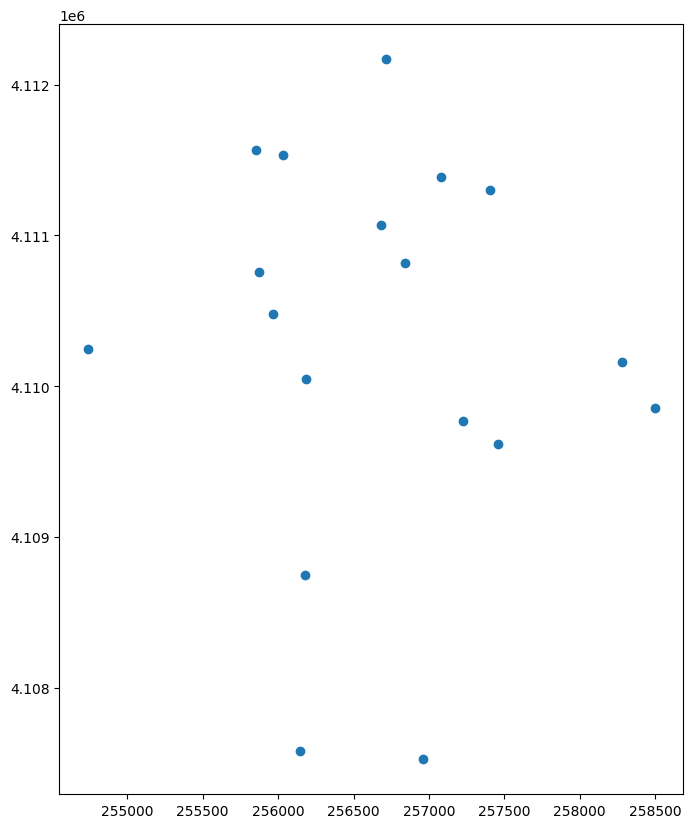

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data using geopandas .plot() method
sjer_plot_locations.plot(ax=ax)

plt.show()

我们可以按要素属性绘制数据并添加图例。我们可以设置以下绘图参数：
列：  
（1）column要用于绘制数据的属性列  
（2）categorical=True：将图设置为绘制分类数据。  
（3）legend：添加图例  
（4）：增大或减小在绘图上渲染的点或标记的大小  
（5）cmap：设置用于绘制数据的颜色  
（6）title：添加标题。  
（7）fig size：指定输出图的大小）。

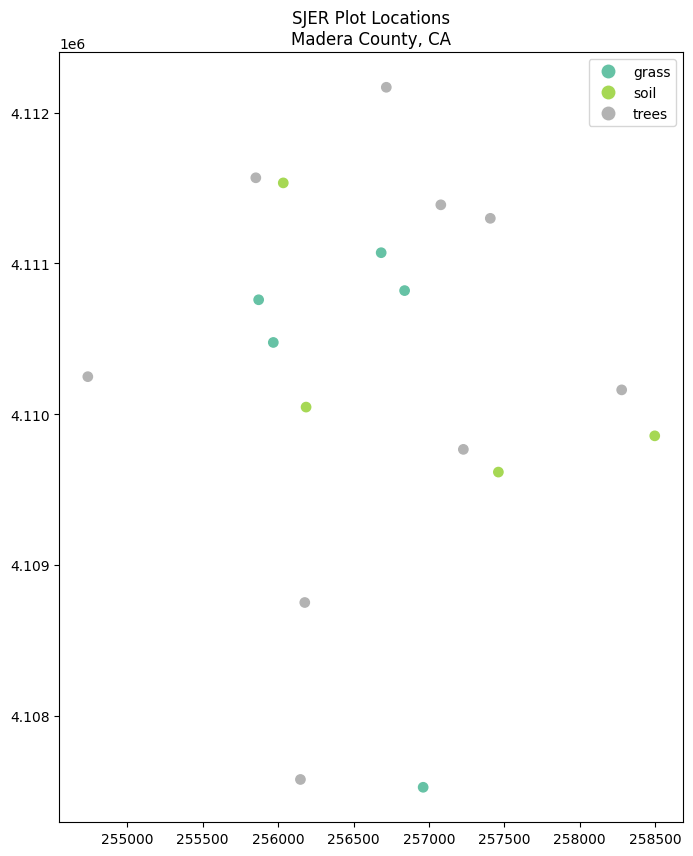

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data and add a legend
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         figsize=(10, 6),
                         markersize=45,
                         cmap="Set2",
                         ax=ax)
# Add a title
ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()